In [2]:
from arquivos import central
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit
import numpy as np
import pandas as pd
import math
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (40,15)

In [3]:
robot = central.Central()
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\EURUSD_20Y.csv', drop=True, drop_list=['Unnamed: 0'], timeframe='H1',pair='EURUSD')

Dados Carregados com Sucesso.


In [13]:
x = x[['EURUSD_Open', 'EURUSD_High', 'EURUSD_Low', 'EURUSD_Close']].to_numpy()

In [15]:
x = x.T
x

array([[1.0073 , 1.0079 , 1.0078 , ..., 1.21801, 1.21808, 1.21809],
       [1.0075 , 1.0079 , 1.008  , ..., 1.21808, 1.21824, 1.21813],
       [1.0073 , 1.0079 , 1.0077 , ..., 1.21798, 1.21807, 1.21796],
       [1.0073 , 1.0079 , 1.008  , ..., 1.21808, 1.21808, 1.21803]])

In [21]:
(x[[0, 1, 2, 3], 1] > 1.0078).sum() > 0

True

In [10]:
np.array([11, 8, 12, 9]) > 10

array([ True, False,  True, False])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#robot.get_normal_data()

In [9]:
#df = pd.read_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\EURUSD_20Y.csv')
df = pd.read_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\EURUSD_20y.csv')
df

,Unnamed: 0,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,tick_volume,spread,real_volume
0,0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,5,50,0
1,1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,1,50,0
2,2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,4,50,0
3,3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,1,50,0
4,4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,4,50,0
...,...,...,...,...,...,...,...,...,...
7747550,7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,12,0,0
7747551,7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,15,0,0
7747552,7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,17,0,0
7747553,7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,29,0,0


In [10]:
df = df.iloc[:, 1:6]
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770
...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808


In [11]:
df['TPSL'] = 0

In [12]:
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,TPSL
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,0
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,0
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,0
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,0
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,0
...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,0
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,0
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,0
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,0


In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770
...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808


In [8]:
df['D1'] = df[df['time'].dt.minute == 0]['EURUSD_Open']
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,D1
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,NaN
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,NaN
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,NaN
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,NaN
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,NaN
...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,NaN
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,NaN
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,NaN
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,NaN


In [ ]:
df['time'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
7747550    23
7747551    23
7747552    23
7747553    23
7747554    23
Name: time, Length: 7747555, dtype: int64

In [ ]:
df['time'].dt.

In [ ]:
df.loc[((df['time'].dt.hour.isin([0, 4, 8, 12, 16, 20])) & (df['time'].dt.minute.isin([0, 1, 2]))), 'EURUSD_Open'].size # H4
# 01 - 1500
# 0 - 1450


95397

In [ ]:
df.loc[((df['time'].dt.minute.isin([0]))), 'EURUSD_Open'].size # H1

128551

In [ ]:
df.loc[((df['time'].dt.hour == 0) & (df['time'].dt.minute.isin([0, 1]))), 'EURUSD_Open'].size # D1

13470

In [ ]:
21.5 * 250 * 3

16125.0

In [ ]:
df['time'].dt.strftime('%d-%m-%y, %H').unique()

array(['03-01-00, 00', '03-01-00, 01', '03-01-00, 02', ...,
       '21-05-21, 21', '21-05-21, 22', '21-05-21, 23'], dtype=object)

In [ ]:
df['time'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
7747550    23
7747551    23
7747552    23
7747553    23
7747554    23
Name: time, Length: 7747555, dtype: int64

In [ ]:
df['at1'] = df[df['time'].dt.minute == 0]['EURUSD_High'] - df[df['time'].dt.minute == 0]['EURUSD_Low']
df['at2'] = abs(df[df['time'].dt.minute == 0]['EURUSD_Low'] - df[df['time'].dt.minute == 0]['EURUSD_Close'].shift(2))
df['at3'] = abs(df[df['time'].dt.minute == 0]['EURUSD_Low'] - df[df['time'].dt.minute == 0]['EURUSD_Close'].shift(2))
df['TPSL'] = df[df['time'].dt.minute == 0][['at1', 'at2', 'at3']].max(1).rolling(14).mean()
df['TPSL'].fillna(df['TPSL'].mean(), inplace=True)

In [ ]:
df[df['time'].dt.minute == 0]['TPSL']

43         0.001443
81         0.001443
122        0.001443
177        0.001443
251        0.001443
             ...   
7747258    0.001066
7747318    0.001235
7747378    0.001234
7747438    0.001341
7747498    0.001378
Name: TPSL, Length: 128551, dtype: float64

In [ ]:
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,D1,at1,at2,at3,TPSL
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,NaN,NaN,NaN,NaN,0.001443
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,NaN,NaN,NaN,NaN,0.001443
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,NaN,NaN,NaN,NaN,0.001443
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,NaN,NaN,NaN,NaN,0.001443
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,NaN,NaN,NaN,NaN,0.001443
...,...,...,...,...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,NaN,NaN,NaN,NaN,0.001443
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,NaN,NaN,NaN,NaN,0.001443
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,NaN,NaN,NaN,NaN,0.001443
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,NaN,NaN,NaN,NaN,0.001443


In [ ]:
df = df.iloc[:, [0,1,2,3,4,5,9]]

In [ ]:
df.loc[df['time'].dt.minute == 0, 'Decycler'] = decycler_oscilator(df.loc[df['time'].dt.minute == 0, 'D1'].reset_index(drop=True))
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,D1,TPSL,Decycler
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,NaN,0.001443,NaN
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,NaN,0.001443,NaN
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,NaN,0.001443,NaN
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,NaN,0.001443,NaN
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,NaN,0.001443,NaN
...,...,...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,NaN,0.001443,NaN
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,NaN,0.001443,NaN
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,NaN,0.001443,NaN
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,NaN,0.001443,NaN


In [ ]:
df.loc[df['time'].dt.minute == 0, 'Sell_Flag'] = df.loc[df['time'].dt.minute == 0, 'Decycler'] < 0
df.loc[df['time'].dt.minute == 0, 'Buy_Flag'] = df.loc[df['time'].dt.minute == 0, 'Decycler'] > 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,D1,TPSL,Decycler,Sell_Flag,Buy_Flag
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,NaN,0.001443,NaN,NaN,NaN
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,NaN,0.001443,NaN,NaN,NaN
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,NaN,0.001443,NaN,NaN,NaN
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,NaN,0.001443,NaN,NaN,NaN
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,NaN,0.001443,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,NaN,0.001443,NaN,NaN,NaN
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,NaN,0.001443,NaN,NaN,NaN
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,NaN,0.001443,NaN,NaN,NaN
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,NaN,0.001443,NaN,NaN,NaN


In [ ]:
data = df.iloc[:, [1,2,3,4,5,6,8,9]].to_numpy().T
"""
Trocar bool para float
Fazert transpose
"""

'\nTrocar bool para float\nFazert transpose\n'

In [ ]:
data = data = data.astype('float64')

In [ ]:
%%time
results = pd.DataFrame()
results_last = []
for i in np.arange(0.1, 5.1, 0.1):
  for j in np.arange(0.1, 5.1, 0.1):
    a, _, _ = single_backtest(data, multiply_tp=i, multiply_sl=j)
    a = np.delete(a, np.where(a == 0.))
    results[f'{i}_{j}'] = pd.Series(a)
    results_last.append(a[-1])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


CPU times: user 8min 55s, sys: 6.45 s, total: 9min 1s
Wall time: 7min 57s


In [ ]:
new_result = pd.DataFrame()
for i in results:
  if results[i].dropna().iloc[-1] > 1000:
    new_result[i] = results[i]

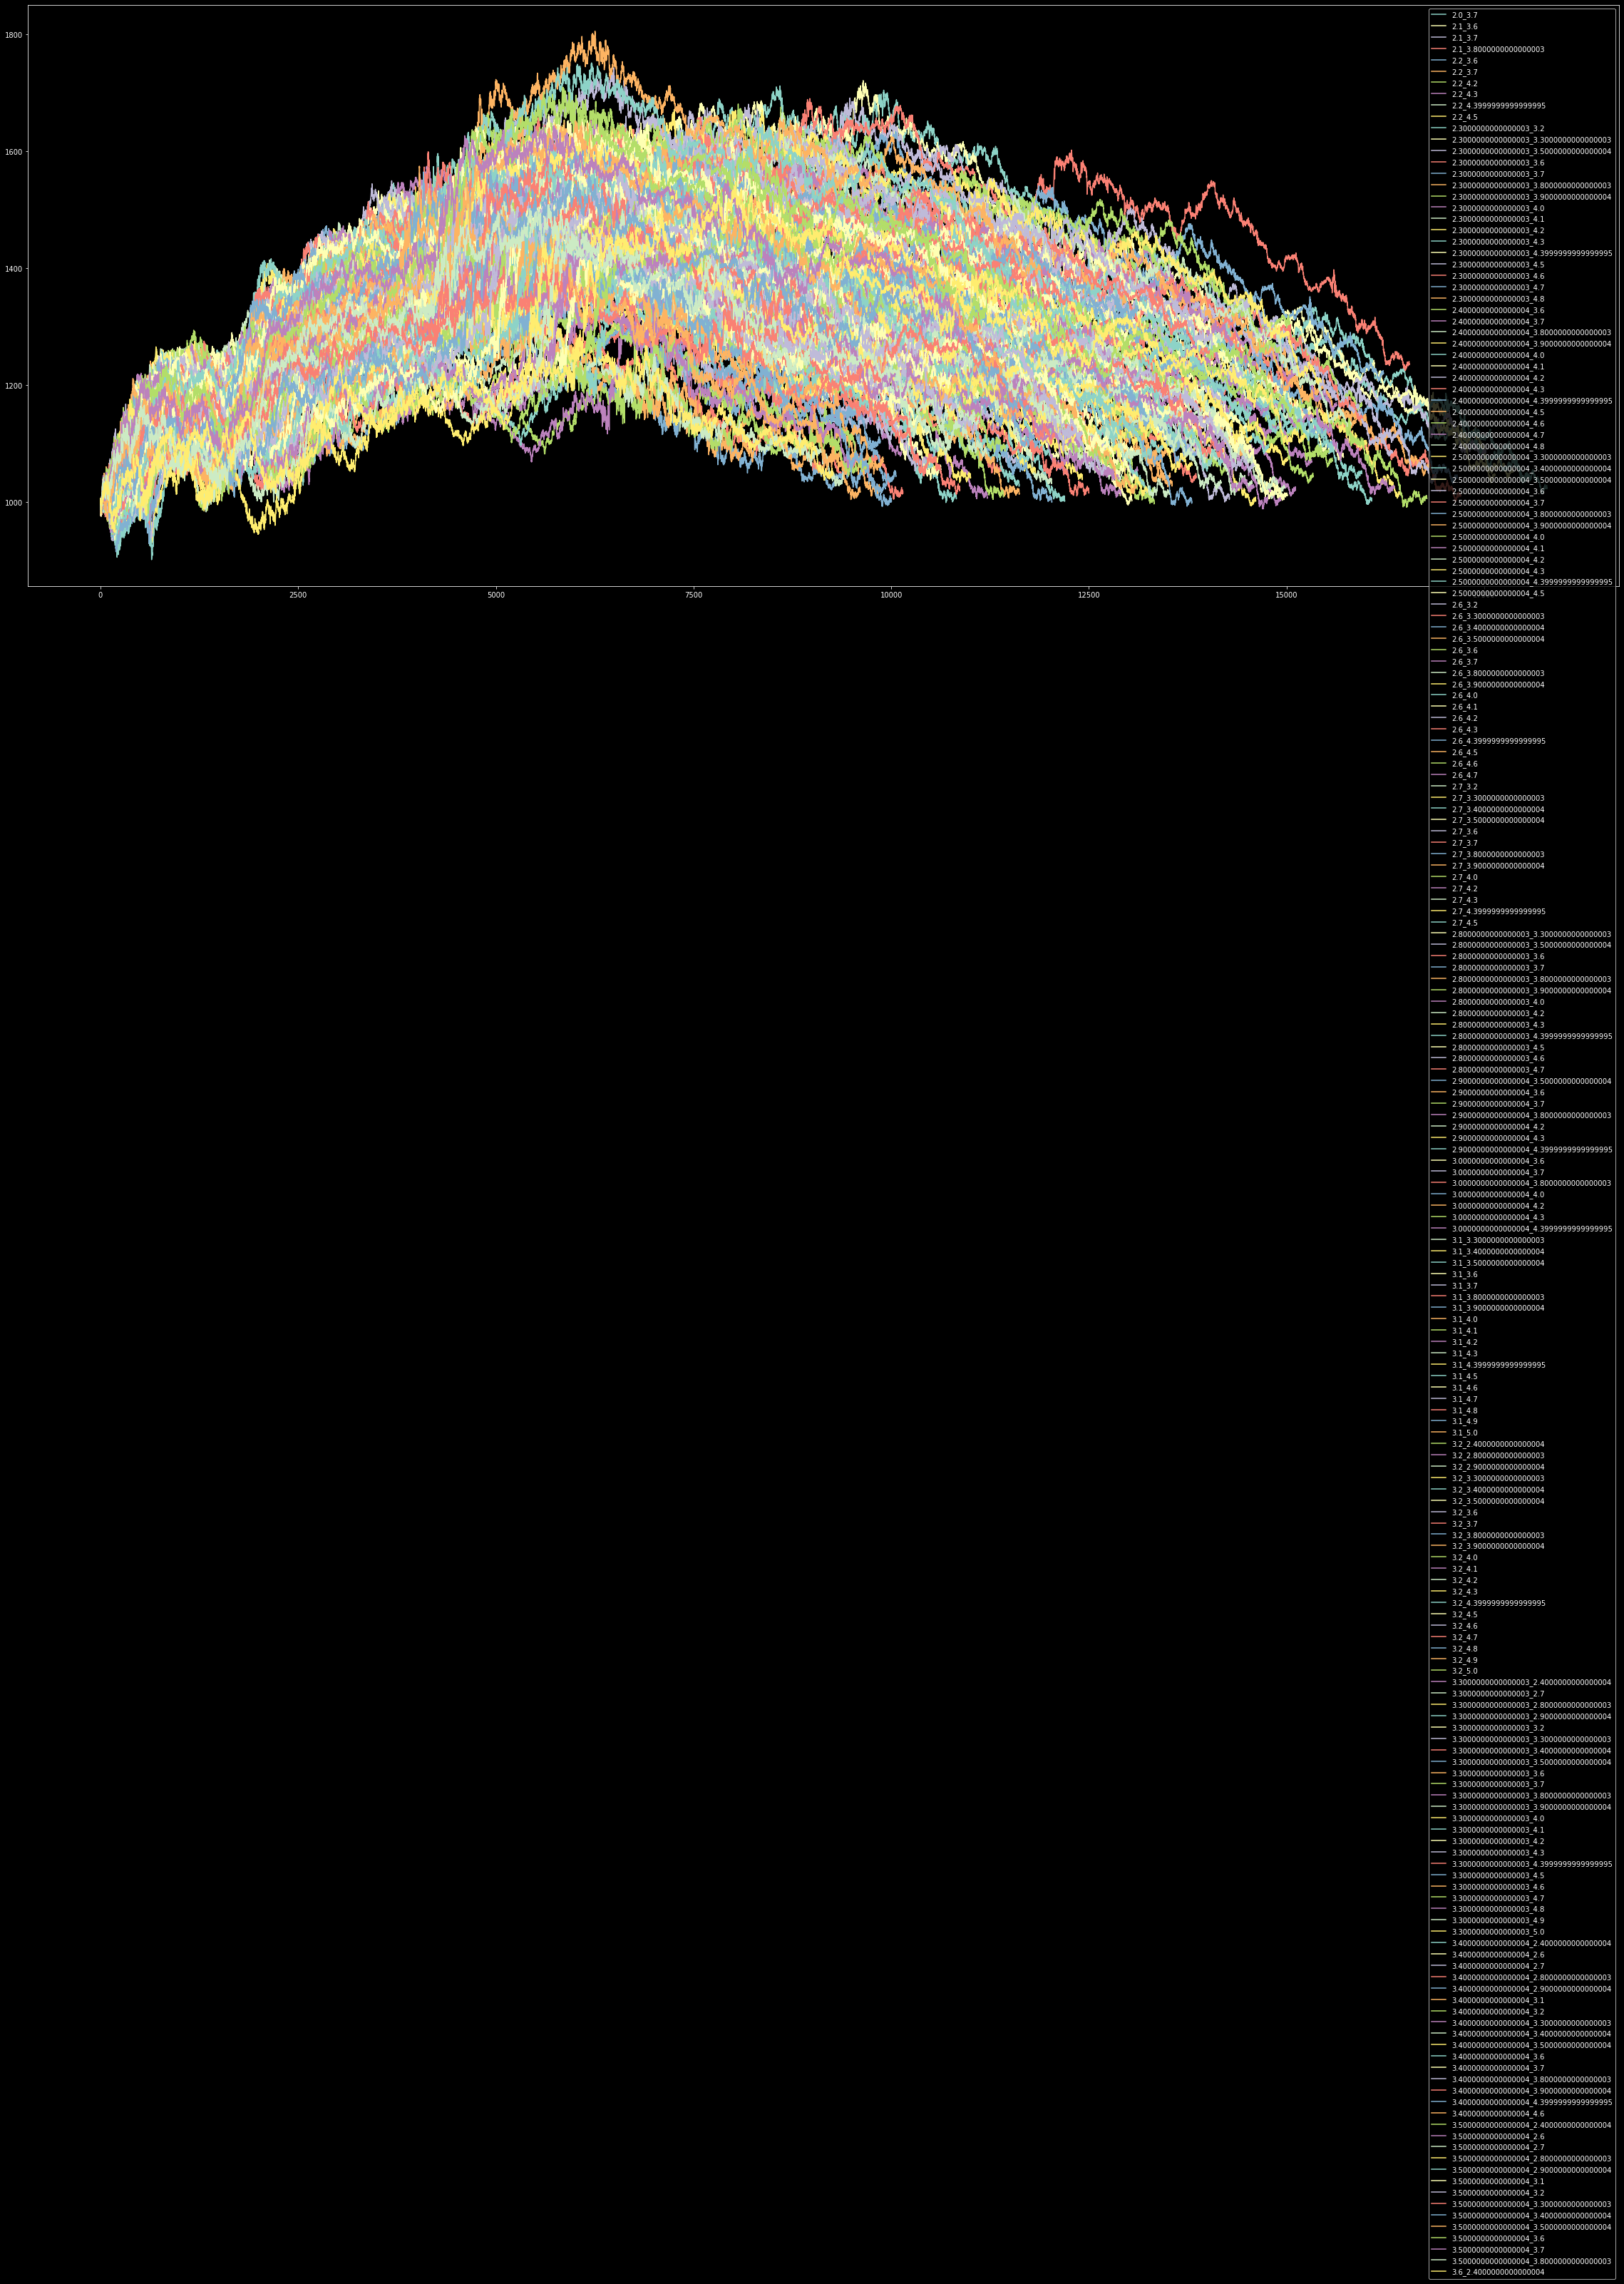

In [ ]:
new_result.iloc[:, :200].plot()

In [ ]:
results.iloc[:, 400:600].plot()

In [ ]:
results.plot()

In [ ]:
a

array([ 1000.    ,   998.9468,   997.893 , ..., -2283.187 , -2284.0784,
       -2284.969 ], dtype=float32)

In [ ]:
data[0].size

7747555

In [ ]:
(preco_final - preco_initlal) / periodo

In [ ]:
math.tan(0.07), math.cos(-0.07)

(0.07011455787200271, 0.9975510002532796)

In [ ]:
math.cos(math.radians(0.07))

0.9999992536874144

In [9]:
d = df['D1'].dropna().reset_index(drop=True)
d

0         1.01290
1         1.01400
2         1.01700
3         1.01730
4         1.01710
           ...   
128546    1.21774
128547    1.21642
128548    1.21766
128549    1.21814
128550    1.21857
Name: D1, Length: 128551, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)


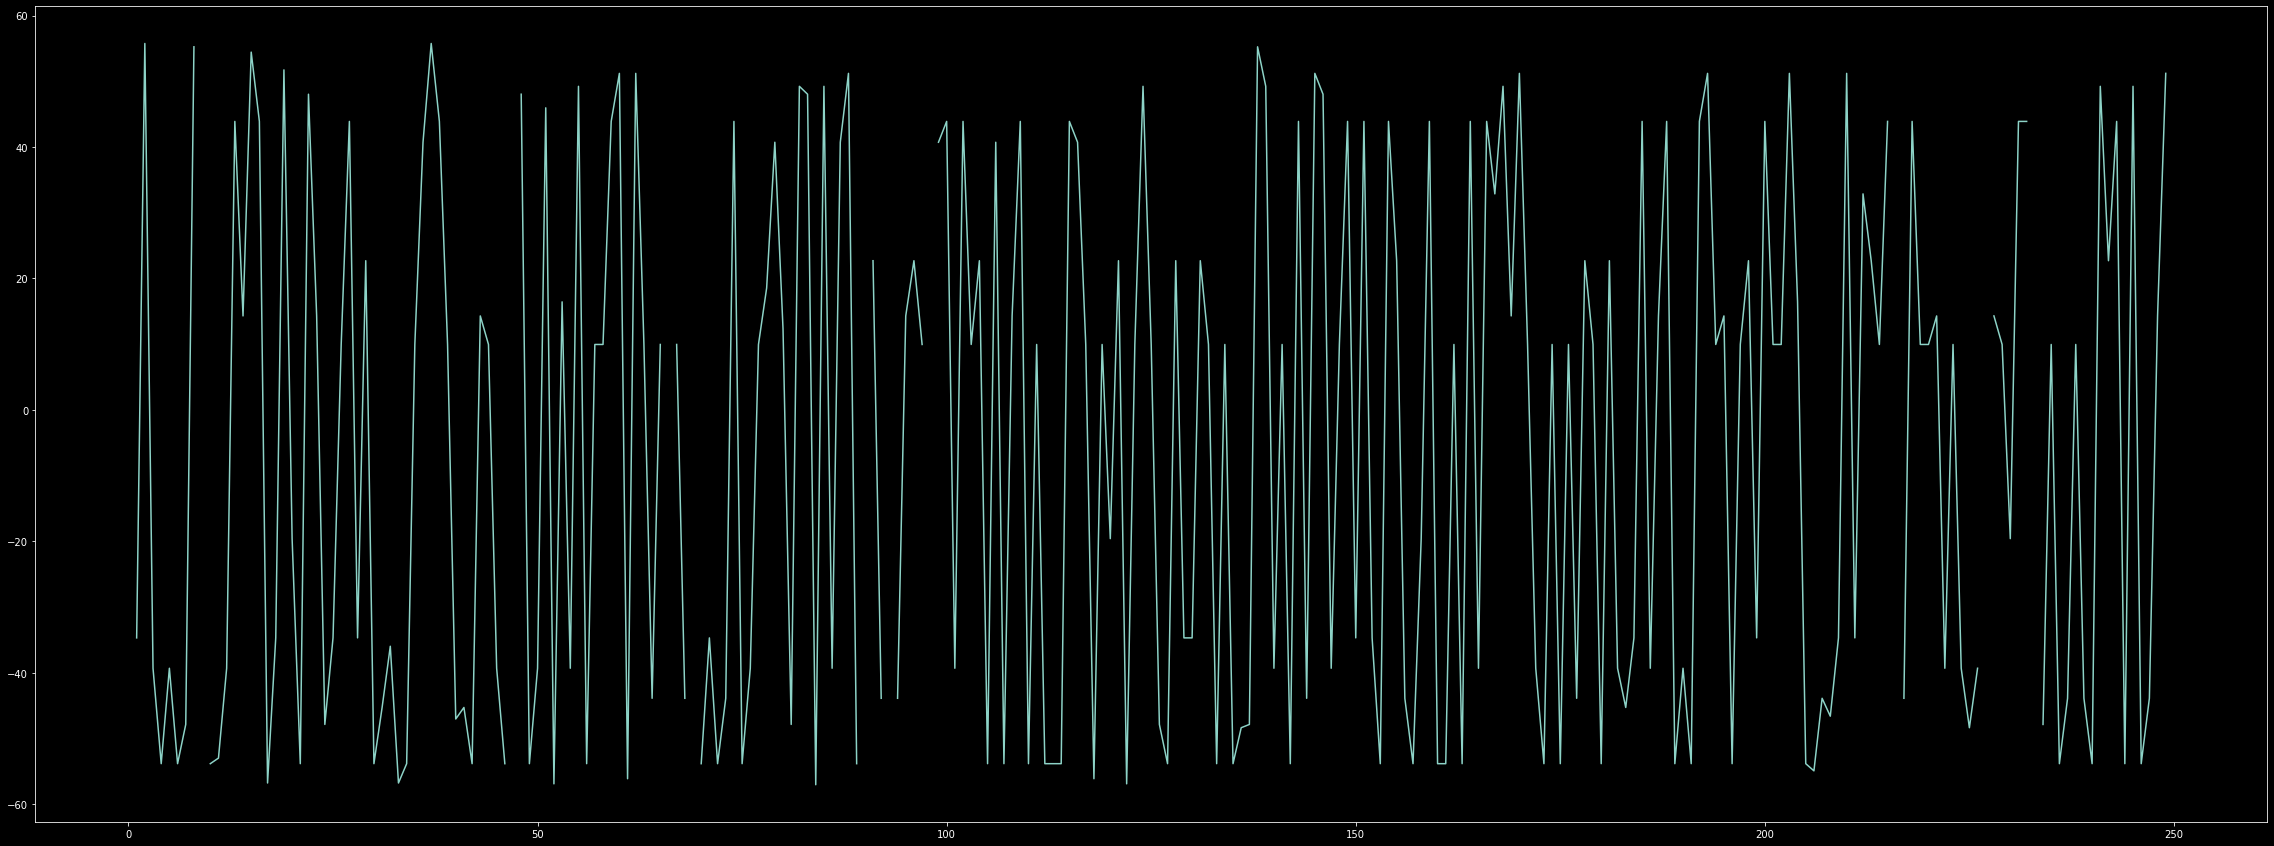

In [29]:
(np.degrees(np.cos(np.radians(14/d.diff()))))[:250].plot()

In [31]:
median_test = np.zeros(d.size)
period = 14
for i in np.arange(d.size):
  m = 0
  if i < 14:
    continue
  for j in np.arange(14):
    m

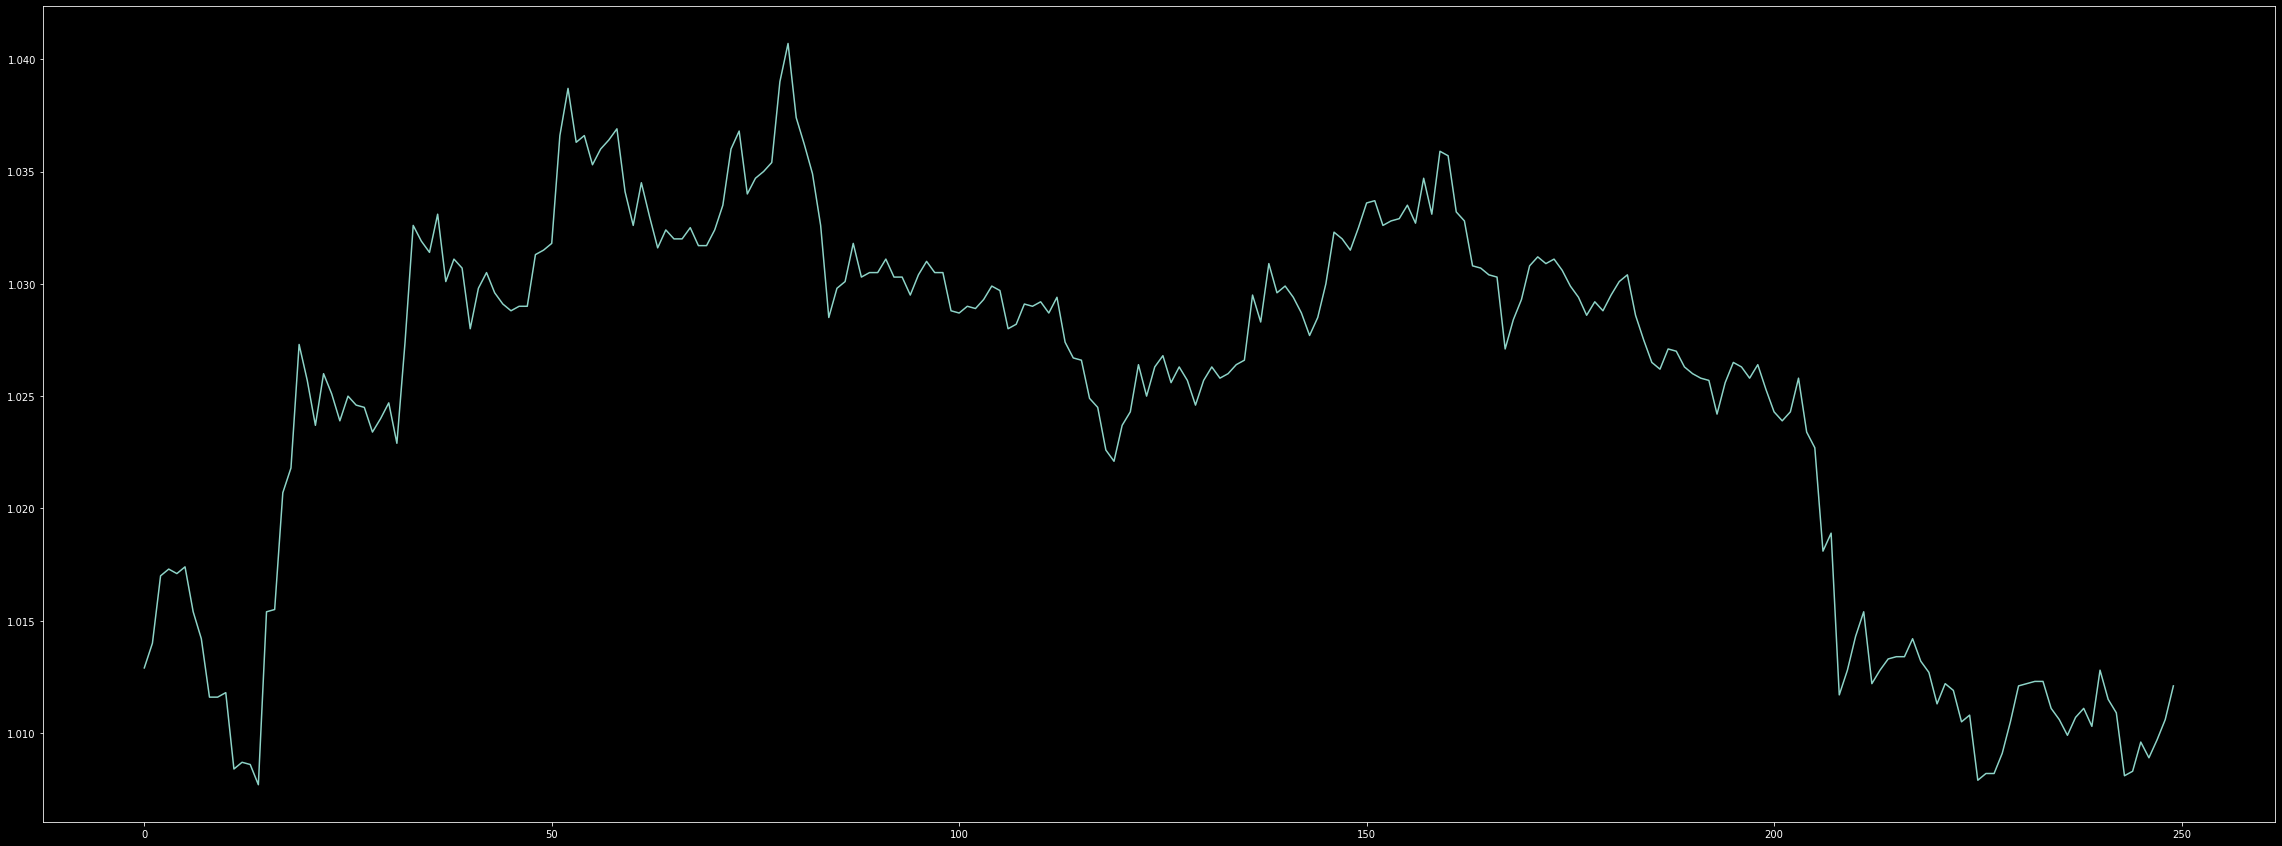

In [30]:
d[:250].plot()

In [ ]:
def decycler_oscilator(series, osc_period1 = 30, osc_period2 = 60):
    """
    Bom para encontrar mudança de tendencias
    """
    alpha1 = (math.cos(math.radians(.707*360 / osc_period1)) + math.sin(math.radians(.707*360 / osc_period1))-1) / math.cos(math.radians(.707*360 / osc_period1))
    alpha2 = (math.cos(math.radians(.707*360 / osc_period2)) + math.sin(math.radians(.707*360 / osc_period2))-1) / math.cos(math.radians(.707*360 / osc_period2))
    decycler_osc = np.zeros(series.size)
    HP1 = np.zeros(series.size)
    HP2 = np.zeros(series.size)
    for i in range(series.size):
        if i < 2:
            continue
        HP1[i] = (1 - alpha1 / 2)*(1 - alpha1 / 2)*(series[i] - 2*series[i-1] + series[i-2]) + 2*(1 - alpha1)*HP1[i-1] - (1 - alpha1)*(1 - alpha1)*HP1[i-2]
        HP2[i] = (1 - alpha2 / 2)*(1 - alpha2 / 2)*(series[i] - 2*series[i-1] + series[i-2]) + 2*(1 - alpha2)*HP2[i-1] - (1 - alpha2)*(1 - alpha2)*HP2[i-2]
        decycler_osc[i] = HP2[i] - HP1[i]
    return decycler_osc

In [ ]:
df['decycler'] = decycler_oscilator(df['EURUSD_Open'])

In [ ]:
df

,time,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,pct,decycler
0,2000-01-03 00:01:00,1.00730,1.00750,1.00730,1.00730,NaN,0.000000
1,2000-01-03 00:02:00,1.00790,1.00790,1.00790,1.00790,NaN,0.000000
2,2000-01-03 00:04:00,1.00780,1.00800,1.00770,1.00800,NaN,-0.000044
3,2000-01-03 00:12:00,1.00790,1.00790,1.00790,1.00790,NaN,-0.000150
4,2000-01-03 00:13:00,1.00800,1.00800,1.00770,1.00770,NaN,-0.000285
...,...,...,...,...,...,...,...
7747550,2021-05-21 23:52:00,1.21788,1.21794,1.21787,1.21794,NaN,-0.000092
7747551,2021-05-21 23:53:00,1.21794,1.21801,1.21794,1.21798,NaN,-0.000080
7747552,2021-05-21 23:54:00,1.21801,1.21808,1.21798,1.21808,NaN,-0.000060
7747553,2021-05-21 23:55:00,1.21808,1.21824,1.21807,1.21808,NaN,-0.000033


<AxesSubplot:>

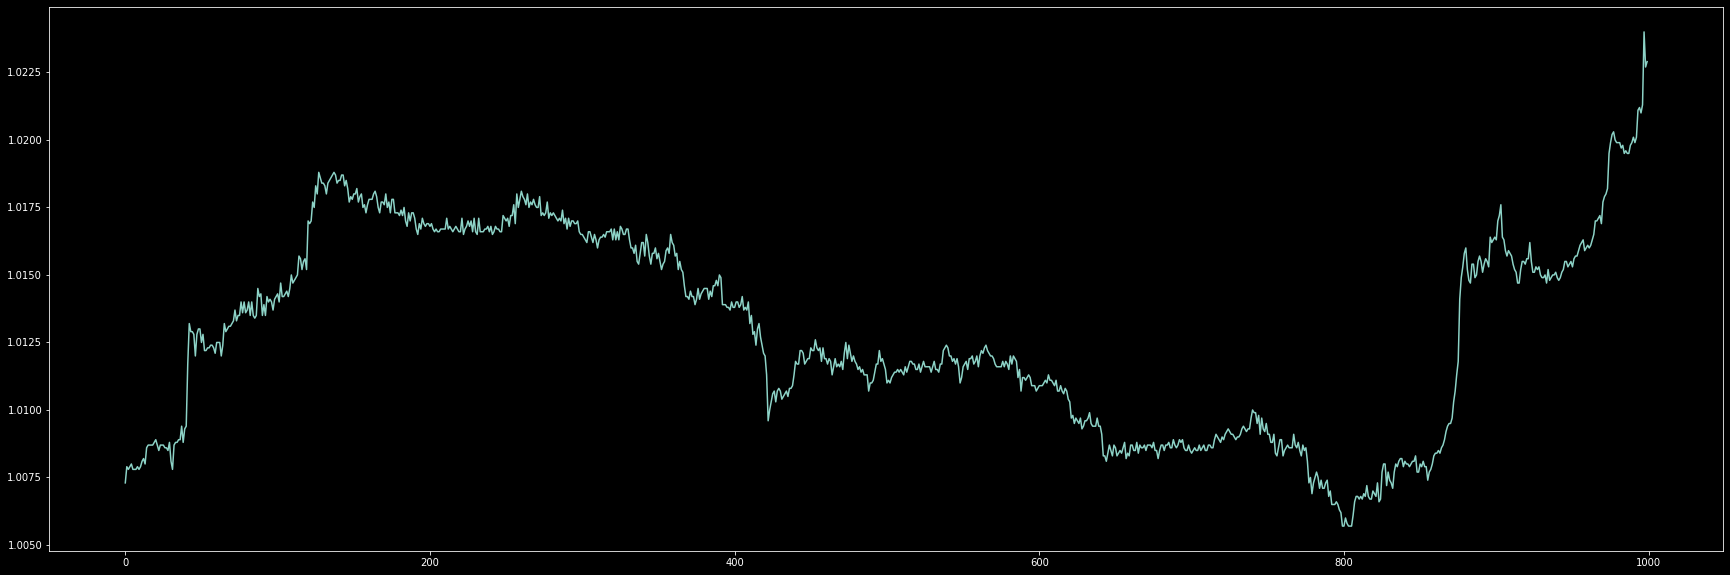

In [ ]:
df['EURUSD_Open'][:1000].plot()

<AxesSubplot:>

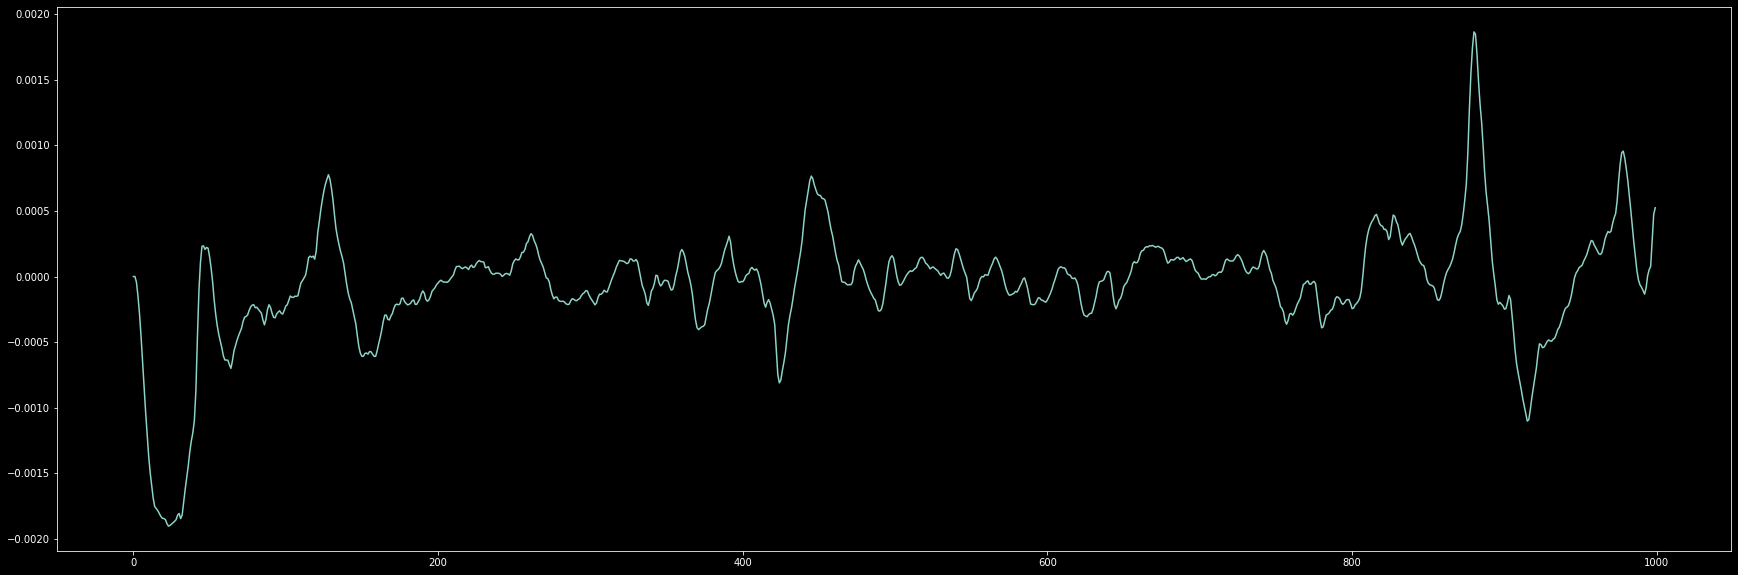

In [ ]:
df['decycler'][:1000].plot()

In [ ]:
np.nan == 10

False